In [1168]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn_lvq import GlvqModel
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from kmodes.kprototypes import KPrototypes




import warnings
warnings.filterwarnings("ignore")

In [1169]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
apartment_for_rent_classified = fetch_ucirepo(id=555) 
  
# data (as pandas dataframes) 
X = apartment_for_rent_classified.data.features 
y = apartment_for_rent_classified.data.targets 
  
# metadata 
print(apartment_for_rent_classified.metadata) 
  
# variable information 
print(apartment_for_rent_classified.variables) 


{'uci_id': 555, 'name': 'Apartment for Rent Classified', 'repository_url': 'https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified', 'data_url': 'https://archive.ics.uci.edu/static/public/555/data.csv', 'abstract': 'This is a dataset of classified for apartments for rent in USA.\n', 'area': 'Business', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 10000, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': None, 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5X623', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "The dataset contains of 10'000 or 100'000 rows and of 22 columns The data has been cleaned in the way that \r\ncolumn price and square_feet never is empty but the dataset is saved as it was created.\r\n\r\n

In [1170]:
# displaying the first few rows of the dataset
apartment_for_rent_classified.data.features.head()

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1,1,USD,No,Thumbnail,Cats,2195.000,2195,Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.852,-118.376,RentLingo,1577360355.000
1,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3,USD,No,Thumbnail,"Cats,Dogs",1250.000,1250,Monthly,1500,146 Lochview Dr,Newport News,VA,37.087,-76.494,RentLingo,1577360340.000
2,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2,3,USD,No,Thumbnail,NaN,1395.000,1395,Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.823,-78.644,RentLingo,1577360332.000
3,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1,2,USD,No,Thumbnail,"Cats,Dogs",1600.000,1600,Monthly,820,209 Aegean Way,Vacaville,CA,38.362,-121.971,RentLingo,1577360330.000
4,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1,1,USD,No,Thumbnail,"Cats,Dogs",975.000,975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.104,-106.611,RentLingo,1577360308.000


In [1171]:
# concatenating features and target into a single DataFrame for easier manipulation
df = pd.concat([X, y], axis=1)

In [1172]:
# previewing the first few rows of the combined DataFrame
df.head()

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1,1,USD,No,Thumbnail,Cats,2195.000,2195,Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.852,-118.376,RentLingo,1577360355.000
1,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3,USD,No,Thumbnail,"Cats,Dogs",1250.000,1250,Monthly,1500,146 Lochview Dr,Newport News,VA,37.087,-76.494,RentLingo,1577360340.000
2,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2,3,USD,No,Thumbnail,NaN,1395.000,1395,Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.823,-78.644,RentLingo,1577360332.000
3,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1,2,USD,No,Thumbnail,"Cats,Dogs",1600.000,1600,Monthly,820,209 Aegean Way,Vacaville,CA,38.362,-121.971,RentLingo,1577360330.000
4,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1,1,USD,No,Thumbnail,"Cats,Dogs",975.000,975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.104,-106.611,RentLingo,1577360308.000


In [1173]:
# checking the shape of the DataFrame
print(f"Shape of the DataFrame: {df.shape}")

Shape of the DataFrame: (99826, 21)


- This dataset has 99826 rows and 22 columns.



In [1174]:
# showing values in normal format
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# descriptive statistics of the DataFrame
df.describe()

,price,latitude,longitude,time
count,99821.000,99797.000,99795.000,99820.000
mean,1527.208,31476.040,-91.562,1559689694.181
std,903.636,7022820.001,15.819,11044865.586
min,100.000,19.574,-159.370,1544174418.000
25%,1014.000,33.750,-104.792,1550831772.750
50%,1350.000,37.230,-84.562,1568745091.500
75%,1795.000,39.954,-77.585,1568767125.250
max,52500.000,1568782042.000,-68.779,1577391425.000


- Avg price of the house is 1527 USD and the max price is 52500 USD.

In [1175]:
#checking information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99826 entries, 0 to 99825
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       99826 non-null  object 
 1   title          99826 non-null  object 
 2   body           99826 non-null  object 
 3   amenities      83749 non-null  object 
 4   bathrooms      99760 non-null  object 
 5   bedrooms       99699 non-null  object 
 6   currency       99822 non-null  object 
 7   fee            99823 non-null  object 
 8   has_photo      99823 non-null  object 
 9   pets_allowed   39192 non-null  object 
 10  price          99821 non-null  float64
 11  price_display  99820 non-null  object 
 12  price_type     99823 non-null  object 
 13  square_feet    99823 non-null  object 
 14  address        7946 non-null   object 
 15  cityname       99521 non-null  object 
 16  state          99521 non-null  object 
 17  latitude       99797 non-null  float64
 18  longit

- We have only 4 numeric columns and 18 categorical columns which are price, time, price_display, latitude and longitude.


In [1176]:
# check for missing values
print("Missing values in each column:" , (df.isnull().sum()))

Missing values in each column: category             0
title                0
body                 0
amenities        16077
bathrooms           66
bedrooms           127
currency             4
fee                  3
has_photo            3
pets_allowed     60634
price                5
price_display        6
price_type           3
square_feet          3
address          91880
cityname           305
state              305
latitude            29
longitude           31
source               6
time                 6
dtype: int64


In [1177]:
# checking the percentage of missing values in each column
df.isnull().mean() * 100 / len(df)

category        0.000
title           0.000
body            0.000
amenities       0.000
bathrooms       0.000
bedrooms        0.000
currency        0.000
fee             0.000
has_photo       0.000
pets_allowed    0.001
price           0.000
price_display   0.000
price_type      0.000
square_feet     0.000
address         0.001
cityname        0.000
state           0.000
latitude        0.000
longitude       0.000
source          0.000
time            0.000
dtype: float64

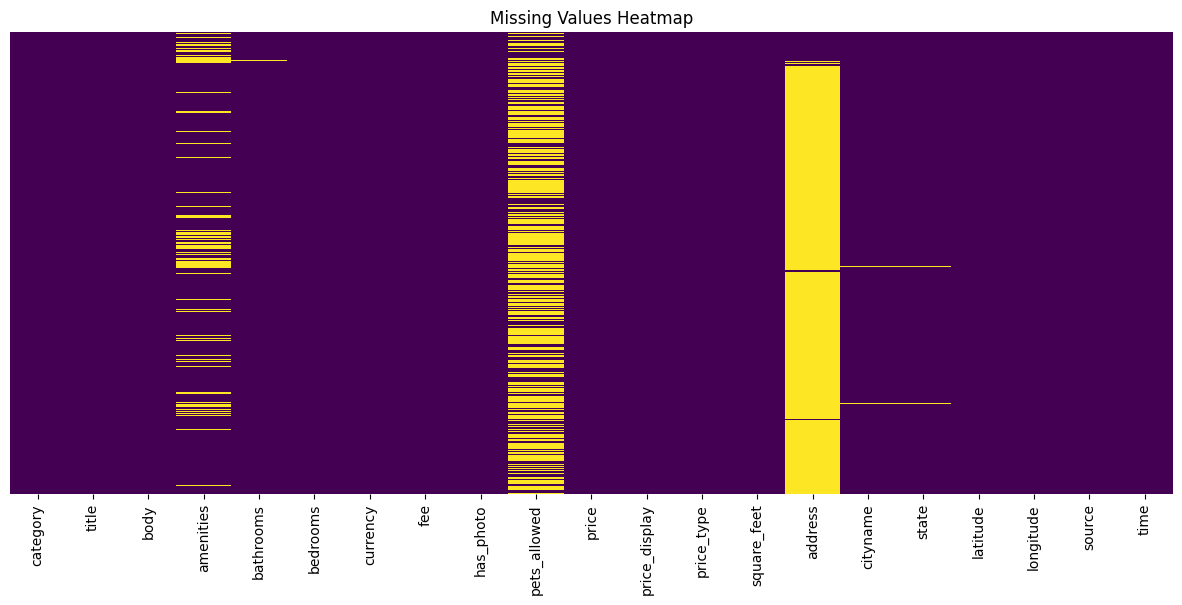

In [1178]:
# printing the heatmap of missing values
plt.figure(figsize=(15, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [1179]:
# check for the duplictes
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 84


In [1180]:
# priting the rows with duplicates

duplicates = df[df.duplicated(keep=False)]
duplicates

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
42217,housing/rent/apartment,"Las Vegas, prime location Two BR, Apartment. P...",Live in the middle of it all! South is a pet f...,"Gym,Parking,Pool",2,2,USD,No,Yes,"Cats,Dogs",1335.000,1335,Monthly,1084,NaN,Las Vegas,NV,36.154,-115.197,RentDigs.com,1568754086.000
42218,housing/rent/apartment,Northglenn Value. Pet OK!,"Square footage: 738 square ft, unit number: 06...","Gym,Parking,Pool,Storage",1,1,USD,No,Yes,"Cats,Dogs",1331.000,1331,Monthly,738,NaN,Northglenn,CO,39.900,-104.944,RentDigs.com,1568754072.000
42219,housing/rent/apartment,Apartment in move in condition in District Hei...,Capital Courts has something for everyone. Loc...,"AC,Parking,Playground,Pool",1.5,3,USD,No,Yes,NaN,1320.000,1320,Monthly,943,NaN,District Heights,MD,38.852,-76.887,RentDigs.com,1568754069.000
42220,housing/rent/apartment,"District Heights, prime location Two BR, Apart...",Income Requirement: Must have 2. 5x the rent i...,Parking,1,2,USD,No,Yes,NaN,1349.000,1349,Monthly,931,NaN,District Heights,MD,38.852,-76.887,RentDigs.com,1568754061.000
42221,housing/rent/apartment,"Spacious One BR, One BA","Square footage: 680 sq-ft, unit number: 122. P...","Basketball,Gym,Patio/Deck,Playground,Pool",1,1,USD,No,Yes,NaN,1260.000,1260,Monthly,680,NaN,Denver,CO,39.900,-104.944,RentDigs.com,1568754056.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83577,housing/rent/apartment,"Apartment, Studio, 400 sq. ft. - in a great area.",Apartment for rent in Ruckersville. Dogs Dogs ...,NaN,1,0,USD,No,No,NaN,725.000,725,Monthly,400.000,NaN,Ruckersville,VA,38.220,-78.384,RentDigs.com,1550823878.000
83578,housing/rent/apartment,offers the lifestyle you deserve in the center...,"Our pet friendly one, 2 and 3 beds apartment h...",NaN,2,2,USD,No,Yes,NaN,1237.000,1237,Monthly,1051.000,NaN,Charlotte,NC,35.320,-80.741,RentDigs.com,1550823780.000
83579,housing/rent/apartment,"Attractive Two BR, Two BA. Pet OK!","Square footage: 1055 square feet, unit number:...","Gym,Parking,Pool",2,2,USD,No,Yes,"Cats,Dogs",1476.000,1476,Monthly,1055.000,NaN,Tempe,AZ,33.392,-111.927,RentDigs.com,1550823679.000
83580,housing/rent/apartment,The Best of the Best in the City of Tempe! Sav...,In the heart of vibrant Tempe near Arizona Sta...,"Gym,Parking,Pool",2,3,USD,No,Yes,NaN,1877.000,1877,Monthly,1261.000,NaN,Tempe,AZ,33.392,-111.927,RentDigs.com,1550823091.000


- We have 84 duplicates in the dataset according to the above code.
- But while carefully analyzing the dataset, we found that the duplicate rows are not the same. As they have different values in some of the columns.


## **Exploratory Data Analysis**

In [1181]:
# check the names of the columns
for col in df.columns:
    print(col)

category
title
body
amenities
bathrooms
bedrooms
currency
fee
has_photo
pets_allowed
price
price_display
price_type
square_feet
address
cityname
state
latitude
longitude
source
time


In [1182]:
# checking the data types of the columns
df.dtypes

category          object
title             object
body              object
amenities         object
bathrooms         object
bedrooms          object
currency          object
fee               object
has_photo         object
pets_allowed      object
price            float64
price_display     object
price_type        object
square_feet       object
address           object
cityname          object
state             object
latitude         float64
longitude        float64
source            object
time             float64
dtype: object

In [1183]:
# check unique values in category columns
df['category'].unique()

array(['housing/rent/apartment', 'housing/rent/home',
       'housing/rent/short_term', 'Gym', 'housing/rent',
       'Parking,Patio/Deck', 'housing/rent/condo', 'housing/rent/other',
       'housing/rent/commercial/retail', '2'], dtype=object)

In [1184]:
# check value counts in category columns
df['category'].value_counts()

category
housing/rent/apartment            99762
housing/rent/commercial/retail       42
housing/rent                          7
housing/rent/home                     4
housing/rent/short_term               4
housing/rent/condo                    3
Gym                                   1
Parking,Patio/Deck                    1
housing/rent/other                    1
2                                     1
Name: count, dtype: int64

- 99762 rows have the category `housing/rent/apartment`.
- `housing/rent/commercial/retail` has 42 records.

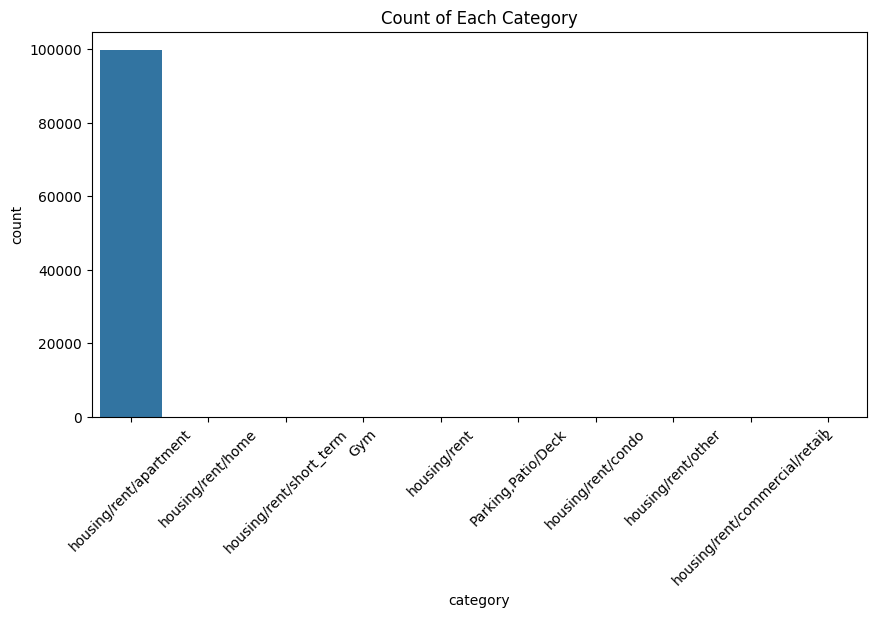

In [1185]:
# plotting the value counts of the 'category' column
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='category')
plt.title('Count of Each Category')
plt.xticks(rotation=45)
plt.show()

In [1186]:
# check the unique values in amenities column
df['amenities'].unique()

array([nan, 'Fireplace,Gym,Parking,Pool,Storage,Wood Floors',
       'Gated,Pool', ...,
       'AC,Clubhouse,Dishwasher,Garbage Disposal,Gym,Internet Access,Patio/Deck,Pool,Refrigerator,Tennis,Washer Dryer',
       'AC,Elevator,Parking,Patio/Deck,Pool,Washer Dryer',
       'Dishwasher,Doorman,Patio/Deck,Refrigerator,Storage,Washer Dryer,Wood Floors'],
      dtype=object)

In [1187]:
# check the value counts in amenities column
df['amenities'].value_counts().sort_values(ascending=False).head(10)

amenities
Parking               6204
Parking,Storage       2117
Gym,Pool              1875
Pool                  1487
Gym,Parking,Pool      1191
Parking,Pool           889
Washer Dryer           843
Patio/Deck             776
Clubhouse,Gym,Pool     768
Gym                    743
Name: count, dtype: int64

- Parking is the most favourite amenity in the dataset wth 6204.
- Parking, Storage are the second most favourite amenities in the dataset with 2117 records

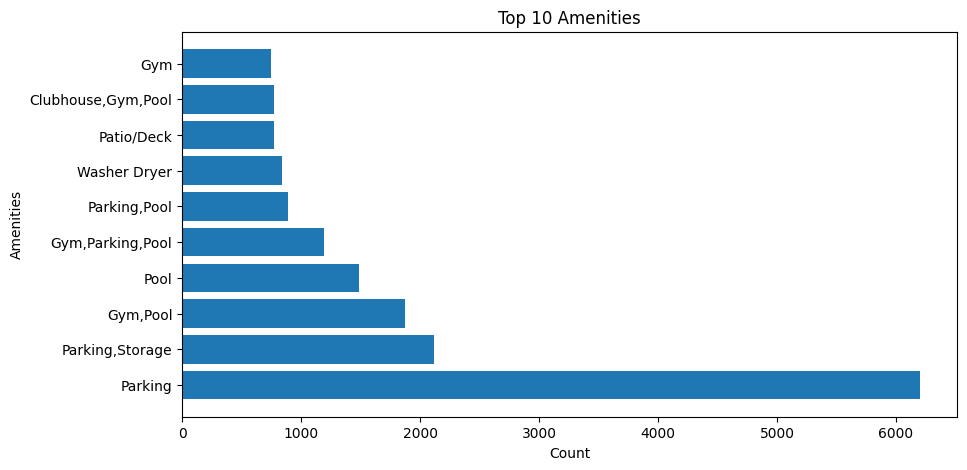

In [1188]:
# plotting the top 10 amenities
plt.figure(figsize=(10, 5))
top_amenities = df['amenities'].value_counts().nlargest(10)
plt.barh(y=top_amenities.index, width=top_amenities.values)
plt.title('Top 10 Amenities')
plt.xlabel('Count')
plt.ylabel('Amenities')
plt.show()

In [1189]:
# no of bathrooms
df['bathrooms'].unique()

array(['1', '1.5', '2', '2.5', '3', '3.5', '4', '7', '4.5', nan, '5', '8',
       '8.5', '6', '5.5', 'No', '9', '7.5', 'Thumbnail', 1.0, 2.0, 2.5,
       1.5, 4.0, 3.0, 3.5, 4.5], dtype=object)

In [1190]:
# check the value counts in bathrooms column
df['bathrooms'].value_counts().sort_values(ascending=False)

bathrooms
 1            55669
 2            36107
 1.5           3148
 2.5           2035
 3              875
1.000           813
2.000           597
 3.5            204
 4              116
2.500            48
 4.5             41
1.500            38
 5               20
3.000            16
 6                8
3.500             5
4.000             4
 5.5              4
 7                3
 No               2
 8                2
 Thumbnail        1
 7.5              1
 9                1
 8.5              1
4.500             1
Name: count, dtype: int64

- Most of the houses have 1 bathroom with 55669 records.
- The records with 2 bathrooms are 36107 

In [1191]:
# checking the unqiue values in currency column
df['currency'].unique()

array(['USD', nan, 'Cats,Dogs', '1019'], dtype=object)

## **Dealing with Ananomalies in `currency` column**

In [1192]:
# check the value counts in currency column	
df['currency'].replace({'Cats,Dogs': 'USD', '1019': 'USD'}, inplace=True)


In [1193]:
# check the value counts in currency column after replacing the values
df['currency'].value_counts()

currency
USD    99822
Name: count, dtype: int64

In [1194]:
# checking unique values in fee column
df['fee'].unique()

array(['No', nan, '1380', '2150', 'Yes', '1019'], dtype=object)

In [1195]:
# check the value counts in fee column
df['fee'].value_counts().sort_values(ascending=False).head(10)

fee
No      99619
Yes       201
1380        1
2150        1
1019        1
Name: count, dtype: int64

In [1196]:
# check for the unqiue values in pets_allowed column
df['pets_allowed'].unique()

array(['Cats', 'Cats,Dogs', nan, 'Dogs', 'Monthly', '823',
       'Cats,Dogs,None'], dtype=object)

### **Dealing with Ananomalies in `pets_allowed` column**

In [1197]:
# calculating the mode of the pets_allowed column
df['pets_allowed'].mode()[0]

'Cats,Dogs'

In [1198]:
# replacing the unqiue values like `Monthly`, `823` replaced with `Cats,Dogs`
df['pets_allowed'].replace({'Monthly': 'Cats,Dogs', '823': 'Cats,Dogs'}, inplace=True)

In [1199]:
# checking the unique values in price_type column
df['price_type'].unique()

array(['Monthly', 'Weekly', 'Monthly|Weekly', nan, 'Lawrence',
       'Los Angeles', 'VA'], dtype=object)

### **Dealing with Ananomalies in `price_type` column**

In [1200]:
# calculating the mode of the price_type column
df['price_type'].mode()[0]

'Monthly'

In [1201]:
# replacing the `Lawrence`, `Los Angeles` and `VA` with `Monthly`
df['price_type'].replace({'Lawrence': 'Monthly', 'Los Angeles': 'Monthly', 'VA': 'Monthly'}, inplace=True)

In [1202]:
# checking the unique values in price column
df['price_type'].value_counts()

price_type
Monthly           99819
Weekly                3
Monthly|Weekly        1
Name: count, dtype: int64

- The most common value in the price_type column is `Monthly` with 99819 records.

In [1203]:
# checking the unique values in state column
df['state'].unique()

array(['CA', 'VA', 'NC', 'NM', 'CO', 'WV', 'GA', 'MA', 'DC', 'AZ', 'IA',
       'WA', 'TX', 'IL', 'MS', 'OR', 'FL', 'MO', 'PA', 'WI', 'OK', 'UT',
       'RI', 'NJ', 'IN', 'MD', 'OH', 'TN', 'ND', 'NE', 'AR', 'MI', 'MN',
       'HI', 'ID', 'SC', 'KS', 'AL', 'SD', 'NY', 'KY', 'LA', 'AK', 'CT',
       'NV', 'WY', 'VT', 'NH', 'MT', 'DE', nan, 'ME', 'RentDigs.com',
       '1550831790'], dtype=object)

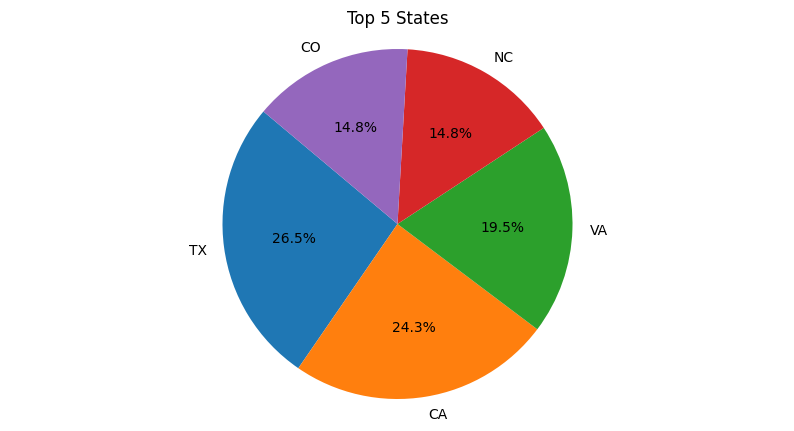

In [1204]:
# plotting the pie plot of 5 tops states
plt.figure(figsize=(10, 5))
top_states = df['state'].value_counts().nlargest(5)
plt.pie(top_states, labels=top_states.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 States')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [1205]:
# Ensure 'square_feet' is numeric
df['square_feet'] = pd.to_numeric(df['square_feet'], errors='coerce')

# Create new column: price per square foot
df['price_per_sqft'] = df['price'] / df['square_feet']

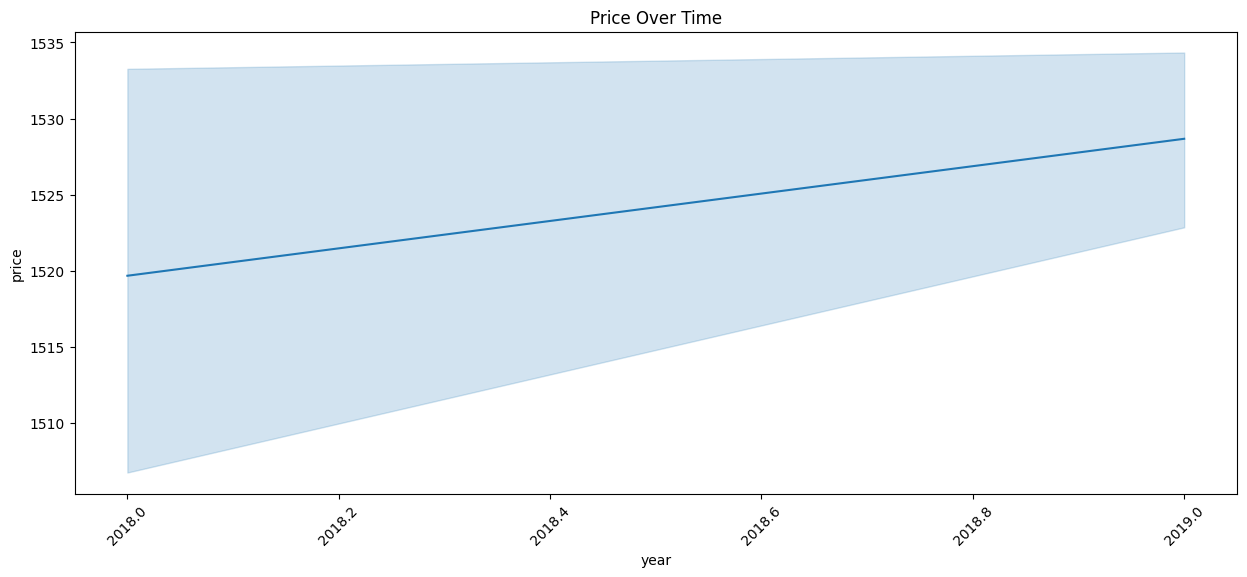

In [1206]:
# Extract the year from the 'time' column and create a new 'year' column
df['year'] = pd.to_datetime(df['time'], unit='s').dt.year

# plotting the line plot of year and price
plt.figure(figsize=(15, 6))
sns.lineplot(x='year', y='price', data=df)
# Set the title and labels
plt.title('Price Over Time')
# Set the x and y labels
plt.xticks(rotation=45)
plt.show()

- Above plot shows the price over the time.
- In 2018 starting the price variations is high
  

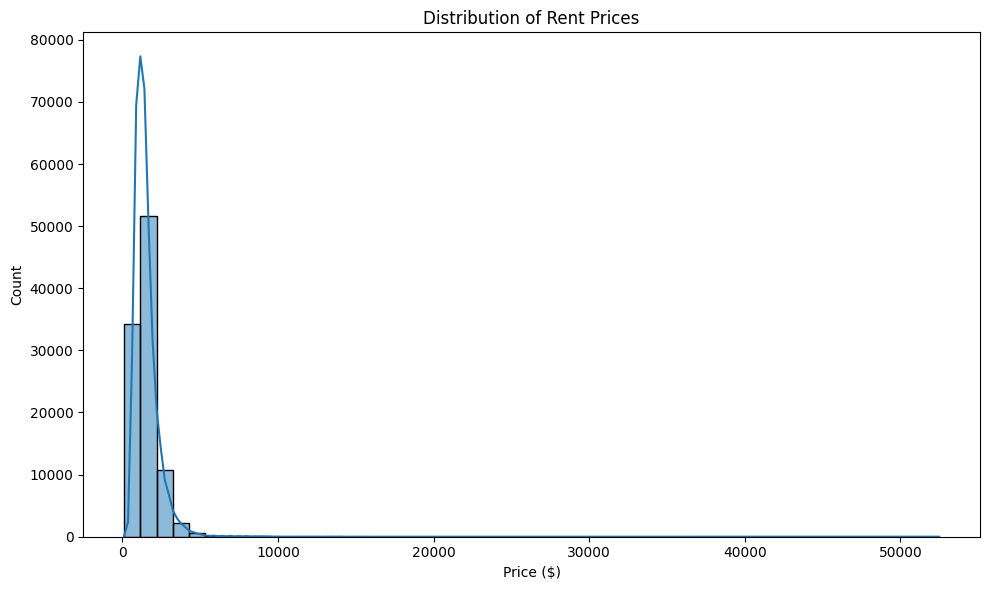

In [1207]:
# plotting the distribution of rent prices
plt.figure(figsize=(10, 6))
# histogram with kernel density estimate (KDE) 
sns.histplot(df['price'], bins=50, kde=True)
# Set the title and labels
plt.title("Distribution of Rent Prices")
plt.xlabel("Price ($)")
plt.ylabel("Count")
# show the plot
plt.tight_layout()
plt.show()

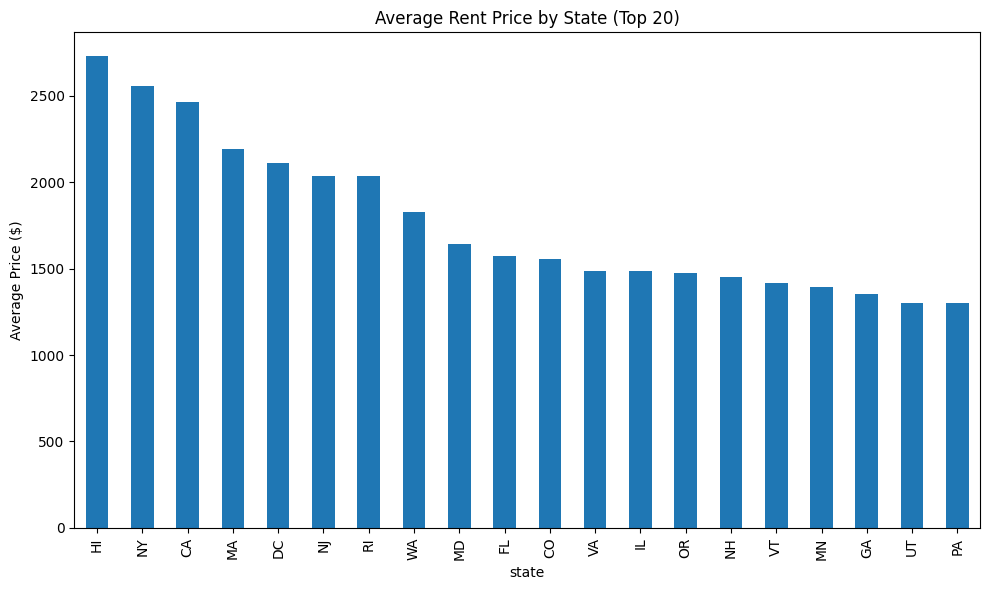

In [1208]:
# plot te bar plot for state and avg price

# define the figure size
plt.figure(figsize=(10, 6))

state_avg_price = df.groupby('state')['price'].mean().sort_values(ascending=False).head(20)
state_avg_price.plot(kind='bar')
plt.title("Average Rent Price by State (Top 20)")
plt.ylabel("Average Price ($)")
plt.tight_layout()
plt.show()


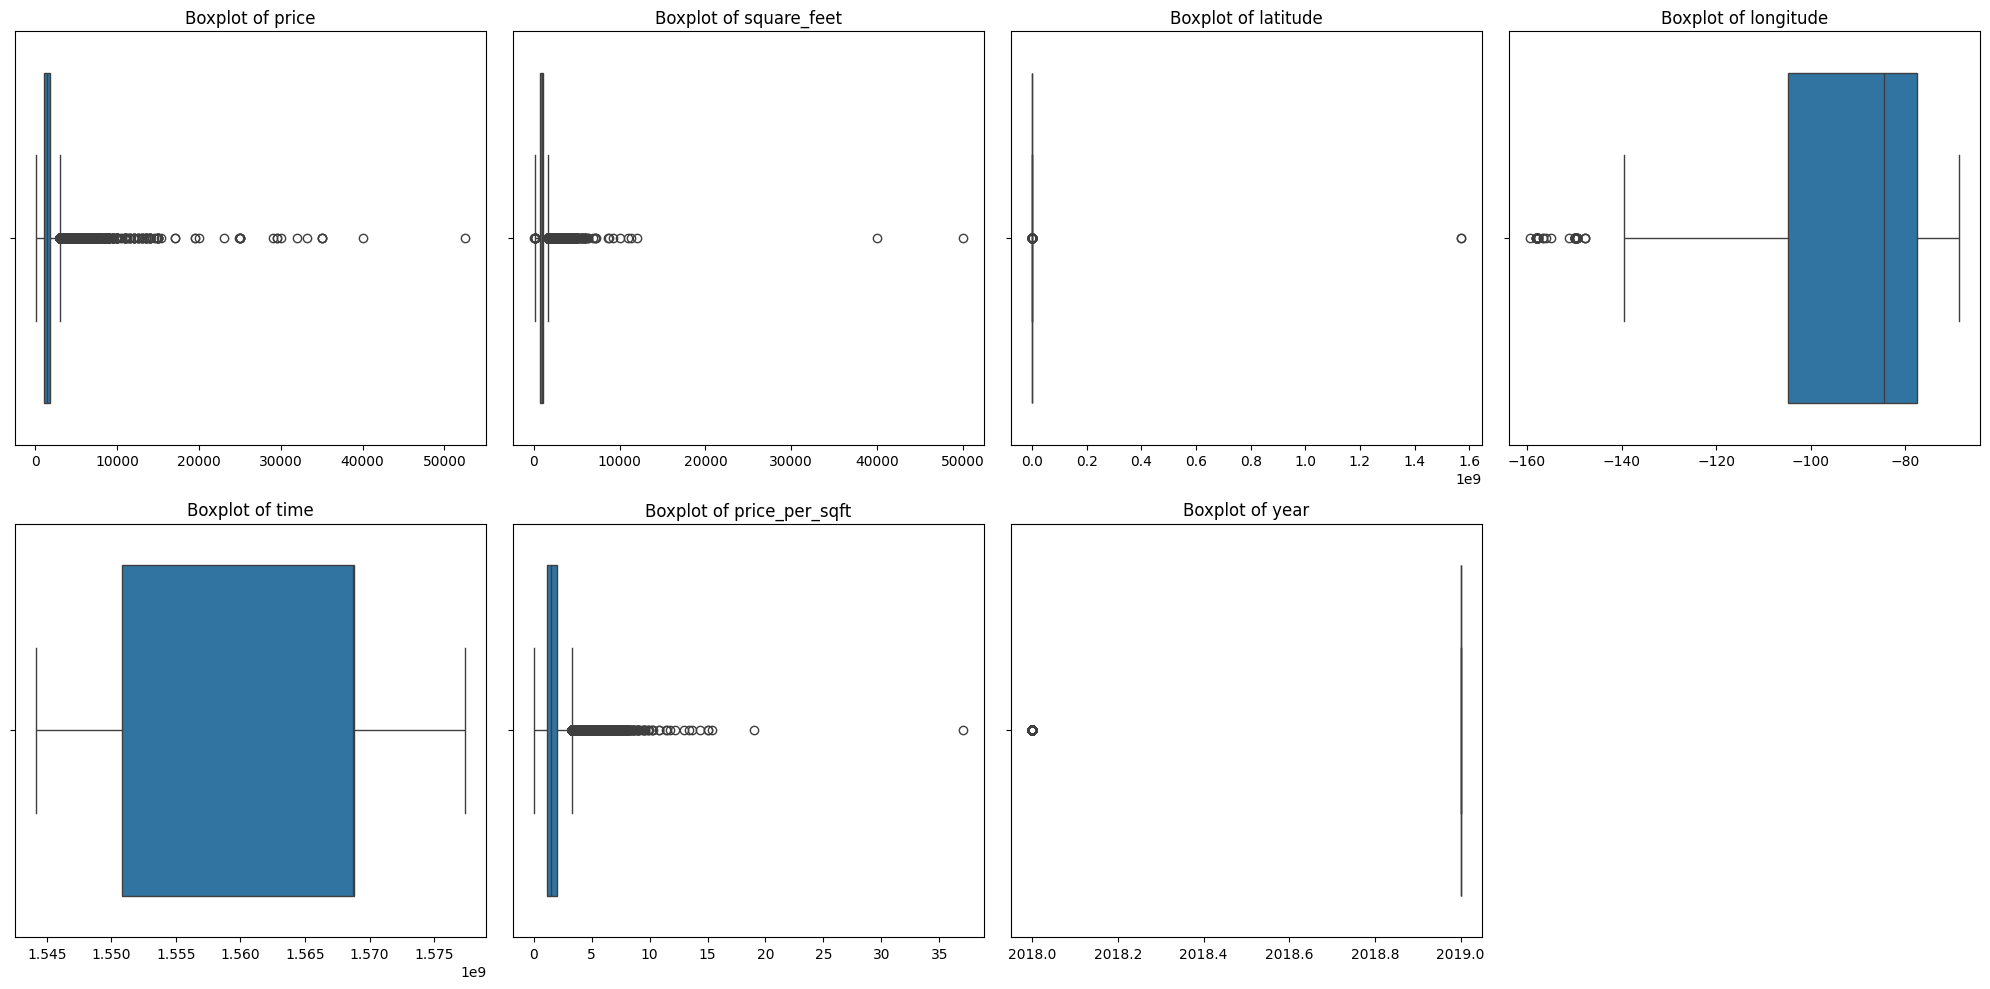

In [1209]:
# Plot individual boxplots for each numeric column in a 2x4 subplot layout
numeric_columns = df.select_dtypes(include=[np.number]).columns
num_plots = len(numeric_columns)

# Define the figure size and number of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Hide any unused subplots
for j in range(num_plots, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Boxplot Insights

- **`price`**: Right-skewed with many high-end outliers (~$50K). Most rents under **$3K**.
- **`square_feet`**: Skewed; some entries exceed **50,000 sq ft** — likely **outliers/errors**.
- **`latitude`**: One major **invalid GPS** outlier (near `1.5e9`).
- **`longitude`**: Normal range for U.S. (-160 to -65).
- **`time`**: Uniform distribution; timestamp needs conversion for deeper insights.
- **`price_per_sqft`**: Most listings fall between **$1–$3**; high values likely premium or incorrect.
- **`year`**: All data from **2018–2019** — short, consistent time frame.


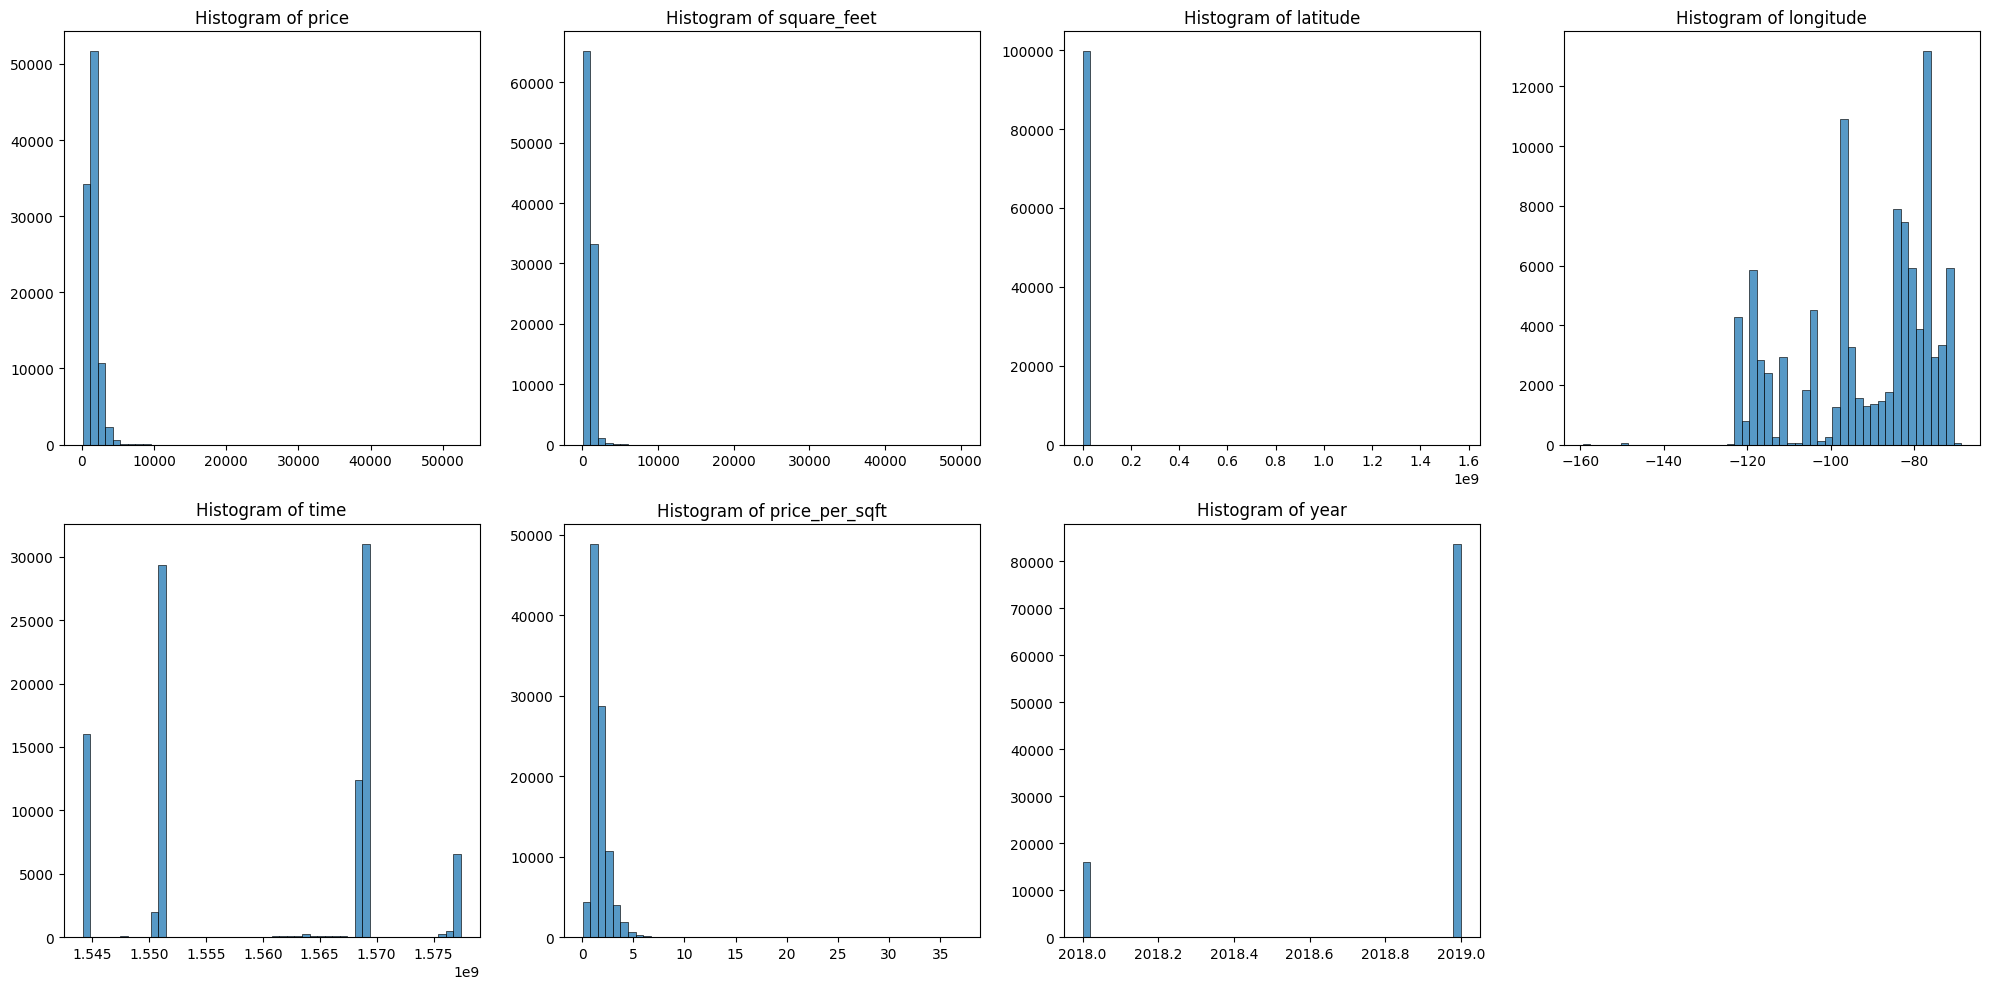

In [1210]:
# Plot individual boxplots for each numeric column in a 2x4 subplot layout
numeric_columns = df.select_dtypes(include=[np.number]).columns
num_plots = len(numeric_columns)

# Calculate the number of rows and columns needed for subplots
ncols = 4
nrows = (num_plots + ncols - 1) // ncols  # Round up to the nearest integer

# Define the figure size and number of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    # Limit the number of bins to reduce memory usage
    sns.histplot(data=df, x=col, ax=axes[i], bins=50)
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Hide any unused subplots
for j in range(num_plots, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Histogram Insights 

- **`bathrooms`**: Most listings have **1 or 2 bathrooms**, with some having 1.5.
- **`bedrooms`**: Dominated by **1–2 bedroom** apartments; few have 3 or more.
- **`price` & `price_display`**: Right-skewed; peak around **$1,000–$1,500**. Few listings above **$2,500**.
- **`square_feet`**: Roughly normal distribution centered around **800–1,000 sq ft**.
- **`latitude`**: Concentrated around **30–40°N**, matching major U.S. population zones.
- **`longitude`**: Spread across **-125 to -70**, covering U.S. east and west coasts.
- **`time`**: Listings posted in **batches**, mostly from **late 2019**.
- **`price_per_sqft`**: Bell-shaped; common range is **$1.3–$1.5/sq ft**.
- **`year`**: Nearly all data is from **2019**, with a small tail from **2018**.



In [1211]:
# checking the correlation between the numeric columns
df.corr(numeric_only=True)

,price,square_feet,latitude,longitude,time,price_per_sqft,year
price,1.000,0.372,-0.004,-0.107,0.057,0.638,0.004
square_feet,0.372,1.000,-0.030,0.060,-0.010,-0.238,-0.004
latitude,-0.004,-0.030,1.000,0.080,0.198,0.103,0.136
longitude,-0.107,0.060,0.080,1.000,0.022,-0.175,-0.007
time,0.057,-0.010,0.198,0.022,1.000,0.091,0.612
price_per_sqft,0.638,-0.238,0.103,-0.175,0.091,1.000,0.002
year,0.004,-0.004,0.136,-0.007,0.612,0.002,1.000


### Correlation Matrix

- **Price ↔ Price/ft²**: Strong positive correlation (**0.64**) — higher-priced listings tend to have higher price per square foot.
- **Price ↔ Square Feet**: Moderate positive (**0.37**) — larger apartments usually cost more.
- **Square Feet ↔ Price/ft²**: Moderate negative (**-0.24**) — larger spaces are cheaper per unit area.
- **Longitude ↔ Price**: Weak negative (**-0.11**) — western listings (e.g., California) may be slightly cheaper.
- **Time ↔ Year**: Strong correlation (**0.61**) — confirms time data is consistent.
- **Others**: Weak or negligible correlations — minimal direct linear relationships.


### Pre-Processing Steps

#### **IQR Outlier Removal**

In [1212]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Columns to clean outliers from
cols_to_clean = ['price', 'square_feet', 'price_per_sqft', 'latitude']

# Apply IQR outlier removal
for col in cols_to_clean:
    df = remove_outliers_iqr(df, col)

#### **Changing Data Types**

In [1213]:
# Convert types
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')
df['square_feet'] = pd.to_numeric(df['square_feet'], errors='coerce')
df['price_display'] = pd.to_numeric(df['price_display'], errors='coerce')

#### **Handling Missing Values**

In [1214]:
# Drop rows with missing key values
df.dropna(how='any', inplace=True)

#### **Data Normalization**

In [1215]:

# Columns to normalize
numeric_cols = ['price', 'square_feet', 'bathrooms', 'bedrooms', 'price_per_sqft']

# Initialize scaler
scaler = MinMaxScaler()

# Normalize and update df
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [1216]:
df.fee.unique()

array(['No', 'Yes'], dtype=object)

In [1217]:
df.head()

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time,price_per_sqft,year
34,housing/rent/apartment,One BR 24625 Wilderness Oak,"This unit is located at 24625 Wilderness Oak, ...","Dishwasher,Parking,Pool,Refrigerator",0.000,0.200,USD,No,Thumbnail,"Cats,Dogs",0.258,975.000,Monthly,0.258,24625 Wilderness Oak,San Antonio,TX,29.462,-98.525,RentLingo,1577359643.000,0.458,2019.000
37,housing/rent/apartment,One BR 4092 Tpc Pkwy,"This unit is located at 4092 Tpc Pkwy, San Ant...","Dishwasher,Elevator,Parking,Pool,Refrigerator",0.000,0.200,USD,No,Thumbnail,"Cats,Dogs",0.258,975.000,Monthly,0.283,4092 Tpc Parkway,San Antonio,TX,29.462,-98.525,RentLingo,1577359469.000,0.429,2019.000
45,housing/rent/apartment,One BR 4320 North Towne Ct,"This unit is located at 4320 North Towne Ct, W...","Cable or Satellite,Dishwasher,Elevator,Firepla...",0.000,0.200,USD,No,Thumbnail,"Cats,Dogs",0.276,1025.000,Monthly,0.259,4320 North Towne Court,Windsor,WI,43.213,-89.344,RentLingo,1577359321.000,0.486,2019.000
46,housing/rent/apartment,Two BR 5235 Kester Ave.,"This unit is located at 5235 Kester Ave., Sher...","Dishwasher,Parking,Pool",0.333,0.400,USD,No,Thumbnail,"Cats,Dogs",0.847,2548.000,Monthly,0.808,5235 Kester Avenue,Sherman Oaks,CA,34.154,-118.445,RentLingo,1577359288.000,0.544,2019.000
47,housing/rent/apartment,Three BR 5206 Moonlight Drive Trail Sw,This unit is located at 5206 Moonlight Drive T...,"Dishwasher,Garbage Disposal,Patio/Deck,Refrige...",0.333,0.600,USD,No,Thumbnail,"Cats,Dogs",0.379,1299.000,Monthly,0.615,5206 Moonlight Dr Trail SW,Concord,NC,35.405,-80.610,RentLingo,1577359279.000,0.311,2019.000


## **K-Means Clustering**

In [1218]:
# Use safe, low-cardinality categorical features
X = df[['bathrooms', 'bedrooms', 'pets_allowed', 'price_type', 'square_feet','amenities' ]]


In [1219]:
# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

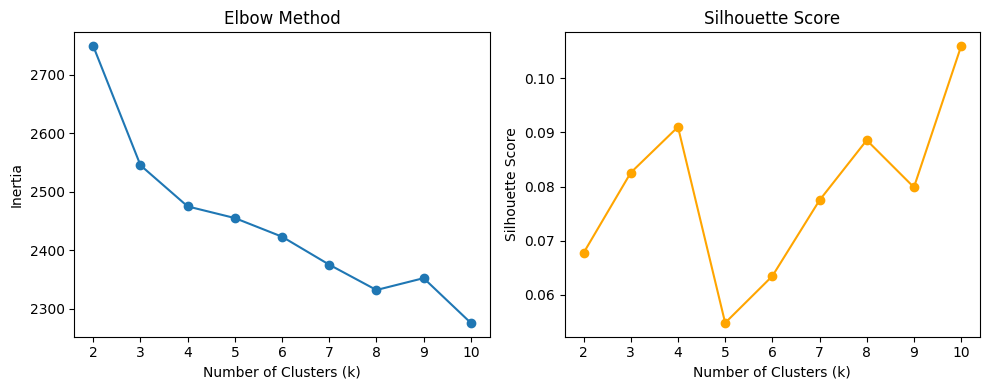

In [1220]:

# Elbow method and silhouette scores
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

# Plot elbow method
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

In [ ]:

# Apply KMeans clustering
best_k = 2
# aopply KMeans with the best k value
kmeans = KMeans(n_clusters=best_k, random_state=42)
df = df.loc[X.index]  # align with input rows

df['cluster'] = kmeans.fit_predict(X)




In [ ]:
# center of the clusters
kmeans.cluster_centers_

array([[ 1.48688835e-03,  2.07623682e-01,  2.94255702e-01, ...,
        -2.33103467e-18,  8.11030008e-04,  1.62206002e-03],
       [ 2.17391304e-02,  2.47826087e-01,  3.35247567e-01, ...,
         5.42101086e-20,  0.00000000e+00,  4.33680869e-19],
       [ 4.34782609e-03,  4.48695652e-01,  4.10479534e-01, ...,
         2.71050543e-19, -6.50521303e-19, -8.67361738e-19],
       ...,
       [ 3.31879845e-01,  4.90116279e-01,  6.82443672e-01, ...,
         3.25260652e-19,  0.00000000e+00,  5.81395349e-03],
       [ 3.19148936e-02,  3.19148936e-01,  3.91778675e-01, ...,
         5.42101086e-20,  0.00000000e+00,  4.33680869e-19],
       [ 1.38777878e-17,  2.20253165e-01,  3.29006347e-01, ...,
         1.62630326e-19,  2.16840434e-19,  8.67361738e-19]])

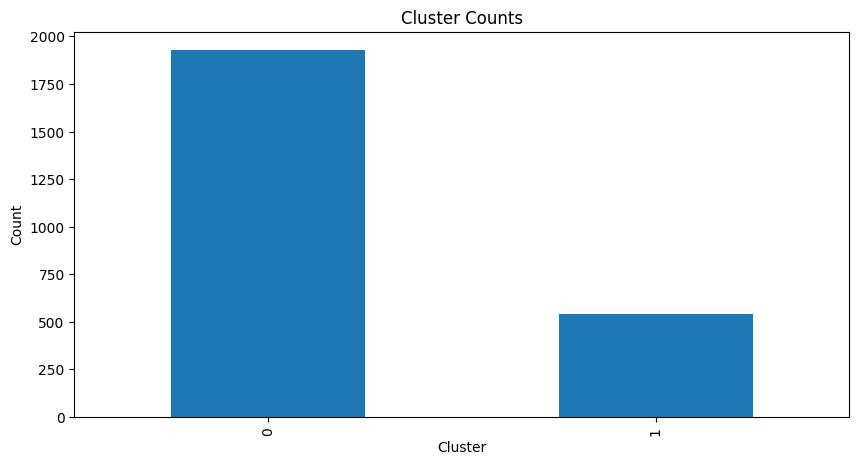

In [843]:
# plot the clusters
df['cluster'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
# Set the title and labels
plt.title('Cluster Counts')
# Set the x and y labels
plt.xlabel('Cluster')
# Set the y label
plt.ylabel('Count')
plt.show()

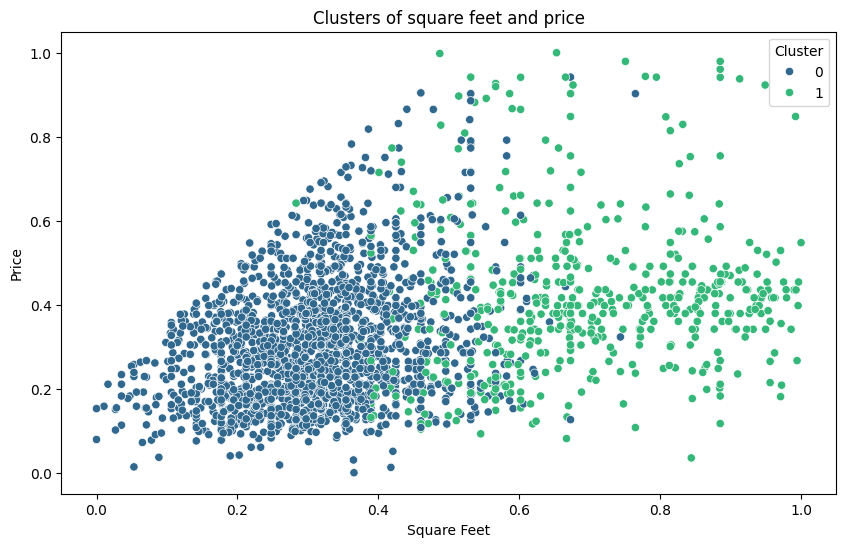

In [840]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='square_feet', y='price', hue='cluster', palette='viridis')
plt.title('Clusters of square feet and price')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.legend(title='Cluster')
plt.show()

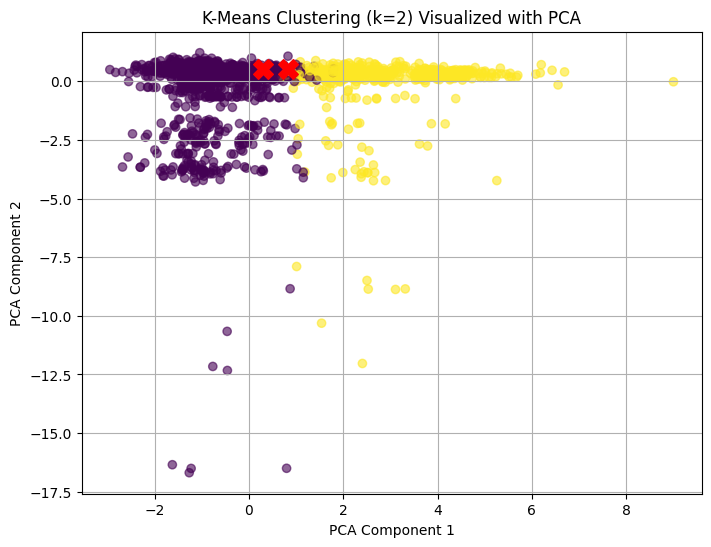

In [ ]:

# Reduce to 2D with PCA
pca = PCA(n_components=2)
# Scale the data for PCA
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters in PCA space
plt.figure(figsize=(8, 6))
# scatter plot of the PCA components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', alpha=0.6)
# plot the cluster centers
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1],
            s=200, c='red', marker='X')
# Set the title and labels
plt.title(f"K-Means Clustering (k={best_k}) Visualized with PCA")
# Set the x and y labels
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


## **K-Prototype Clustering**

In [1221]:
# Define the indices of the numerical and categorical features
cat_cols = df[['pets_allowed', 'price_type', 'amenities']]
num_cols = df[['bedrooms', 'bathrooms']]

In [1222]:
# Perform k-prototype clustering
# Ensure 'pets_allowed' is included in X
if 'pets_allowed' not in X.columns:
	X['pets_allowed'] = cat_cols['pets_allowed']

# Extract the indices of categorical columns
categorical_indices = [X.columns.get_loc(col) for col in cat_cols.columns if col in X.columns]

kp = KPrototypes(n_clusters=4, init='Cao', n_init=5, verbose=1)
clusters = kp.fit_predict(X, categorical=categorical_indices) 

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 921, ncost: 2526.8507708355132
Run: 1, iteration: 2/100, moves: 82, ncost: 2522.374039401971
Run: 1, iteration: 3/100, moves: 1, ncost: 2522.371155508858
Run: 1, iteration: 4/100, moves: 0, ncost: 2522.371155508858
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 234, ncost: 2593.392629353715
Run: 2, iteration: 2/100, moves: 15, ncost: 2590.8019937849785
Run: 2, iteration: 3/100, moves: 0, ncost: 2590.8019937849785
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 247, ncost: 2537.5280535135817
Run: 3, iteration: 2/100, moves: 5, ncost: 2537.2961580047777
Run: 3, iteration: 3/100, moves: 0, ncost: 2537.2961580047777
Init: initializing centroids
Init: initializing clusters
Sta

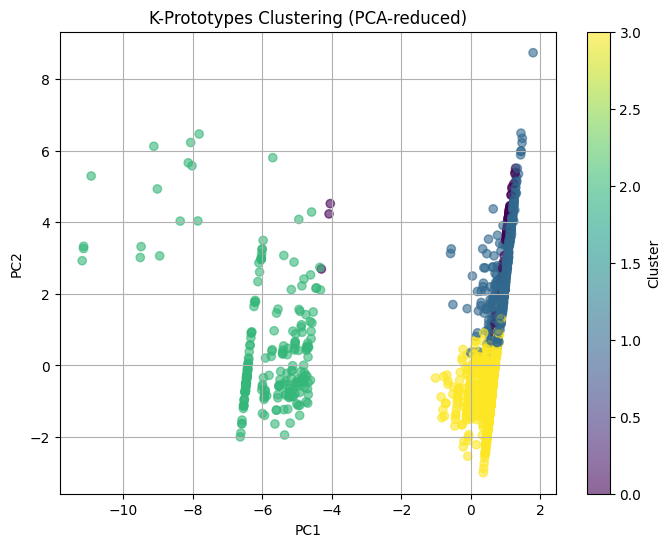

In [1226]:

# Convert categorical features to numeric (using get_dummies for simplicity)
X_encoded = pd.get_dummies(X)

# Standardize for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Applying PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Plot with cluster labels
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title("K-Prototypes Clustering (PCA-reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()


In [1223]:
# check the cluster labels
clusters

array([3, 3, 3, ..., 3, 1, 1], dtype=uint16)

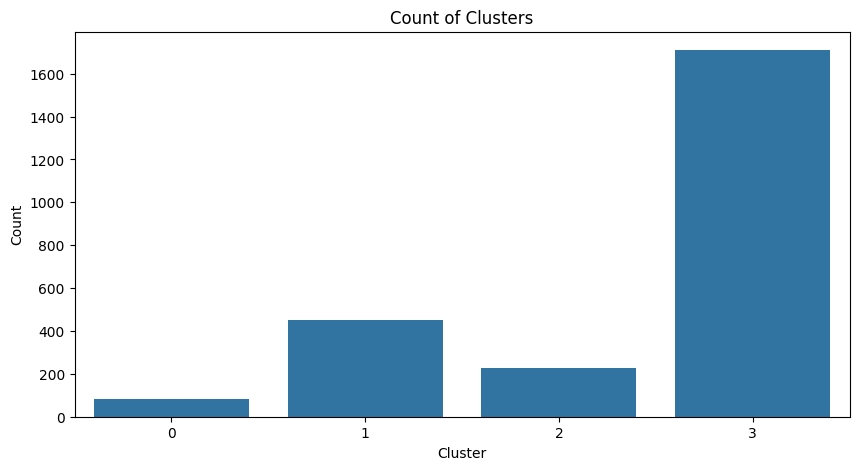

In [1224]:

# check the number of clusters
np.unique(clusters, return_counts=True)
# plot the bar plot of clusters
plt.figure(figsize=(10, 5))
sns.countplot(x=clusters)
plt.title('Count of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()
